In [3]:
from data import WiderFaceDetection, preproc, detection_collate
import os
import torch
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_dataset = "./data/widerface/train/label.txt"
img_dim = 640
rgb_mean = (104, 117, 123) # bgr order
dataset = WiderFaceDetection(training_dataset,preproc(img_dim, rgb_mean))
print(dataset)

In [3]:
print(len(dataset[0][0][0]))
print(dataset[0][0][0].shape)


640
torch.Size([640, 640])


In [4]:
print(len(dataset[0][0][0][0]))
print(dataset[0][0][0][0].shape)

640
torch.Size([640])


In [5]:
print(len(dataset[0][0]))
print(dataset[0][0].shape)

3
torch.Size([3, 640, 640])


In [6]:
len(dataset[0])

2

In [7]:
len(dataset)

12880

In [8]:
# 데이터셋 및 DataLoader 생성
batch_size = 32
num_workers = 4
dataset = WiderFaceDetection(training_dataset, preproc(img_dim, rgb_mean))
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, collate_fn=detection_collate)

# 첫 번째 배치 데이터 확인
images, targets = next(iter(data_loader))
print(f"Images Shape: {images.shape}")
print(f"Targets Shape: {len(targets)}")  # Targets는 리스트 형태일 가능성이 높음


Images Shape: torch.Size([32, 3, 640, 640])
Targets Shape: 32


In [13]:
# 첫 번째 배치의 첫 번째 이미지 & 타겟 데이터 가져오기
image = images[1].cpu().numpy()  # (C, H, W) → (H, W, C)
target = targets[1]  # 첫 번째 이미지의 타겟 정보
# Bounding Box 및 랜드마크를 이미지에 표시하는 함수
def draw_targets(image, target):
    image = (image * 255).astype(np.uint8)  # 정규화된 이미지를 0-255 픽셀 범위로 변환
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV는 BGR을 사용하므로 변환

    # Bounding Box 그리기
    for t in target:
        x_min, y_min, x_max, y_max = int(t[0] * image.shape[1]), int(t[1] * image.shape[0]), \
                                     int(t[2] * image.shape[1]), int(t[3] * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # 초록색 박스

        # 랜드마크 좌표 (얼굴 특징점) 그리기 (x, y 좌표 5쌍)
        for i in range(4, 14, 2):  # 4번째부터 14번째까지 (5개 랜드마크)
            x, y = int(t[i] * image.shape[1]), int(t[i + 1] * image.shape[0])
            cv2.circle(image, (x, y), 2, (0, 0, 255), -1)  # 빨간색 점

    return image

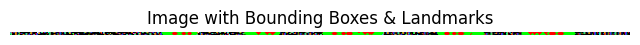

In [14]:
image_with_targets = draw_targets(image, target)

# Matplotlib으로 이미지 출력
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_with_targets, cv2.COLOR_BGR2RGB))  # 다시 RGB로 변환하여 출력
plt.axis("off")
plt.title("Image with Bounding Boxes & Landmarks")
plt.show()

In [15]:
print(torch.__version__)

2.5.1


In [41]:
img_path = "/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/0--Parade/0_Parade_marchingband_1_849.jpg"
img = cv2.imread(img_path)
height, width, _ = img.shape

# 디버깅을 쉽게 하기 위한 코드 (for문을 쓰지 않고 하나씩 np.array로 만들어서 처리)
labels = "449 330 122 149 488.906 373.643 0.0 542.089 376.442 0.0 515.031 412.83 0.0 485.174 425.893 0.0 538.357 431.491 0.0 0.82"
label = labels.split(' ')
print(f"label: {label}")
annotations = np.zeros((0, 15))

print(f"annotations: {annotations}")
annotation = np.zeros((1, 15))
# bbox
annotation[0, 0] = label[0]  # x1
print(f"annotations0: {annotation}")
annotation[0, 1] = label[1]  # y1
print(f"annotation1: {annotation}")
annotation[0, 2] = label[0] + label[2]  # x2
print(f"annotation2: {annotation}")
annotation[0, 3] = label[1] + label[3]  # y2
print(f"annotation3: {annotation}")
# landmarks
annotation[0, 4] = label[4]    # l0_x
print(f"annotations 4: {annotation}")
annotation[0, 5] = label[5]    # l0_y
print(f"annotations: {annotation}")
annotation[0, 6] = label[7]    # l1_x
print(f"annotations: {annotation}")
annotation[0, 7] = label[8]    # l1_y
print(f"annotations: {annotation}")
annotation[0, 8] = label[10]   # l2_x
print(f"annotations: {annotation}")
annotation[0, 9] = label[11]   # l2_y
print(f"annotations: {annotation}")
annotation[0, 10] = label[13]  # l3_x
print(f"annotations: {annotation}")
annotation[0, 11] = label[14]  # l3_y
print(f"annotations: {annotation}")
annotation[0, 12] = label[16]  # l4_x
print(f"annotations: {annotation}")
annotation[0, 13] = label[17]  # l4_y
print(f"annotations: {annotation}")
print("-----------------")
print(f"annotation shape: {annotation.shape}")
print("-----------------")
if (annotation[0, 4]<0):
    annotation[0, 14] = -1
else:
    annotation[0, 14] = 1

annotations = np.append(annotations, annotation, axis=0)
print(f"annotations: {annotations}")
print("-----------------")
print(f"annotations shape: {annotations.shape}")
print("-----------------")
target = np.array(annotations)
print(f"target = {target}")
print("-----------------")
print(f"target shape = {target.shape}")
print("-----------------")


print(img, target)
img_dim = 640
rgb_means = (104, 117, 123)

boxes = target[:, :4].copy()
labels = target[:, -1].copy()
landm = target[:, 4:-1].copy()
print(f'boxes={boxes}, labels={labels}, landm={landm}')
print(f"boxes shape={boxes.shape}, labels shape={labels.shape}, landm shape={landm.shape}") 

print("-----------------")
# image_t, boxes_t, labels_t, landm_t, pad_image_flag = _crop(image, boxes, labels, landm, img_dim)





# image_t = _distort(image_t)
# image_t = _pad_to_square(image_t, rgb_means, pad_image_flag)
# image_t, boxes_t, landm_t = _mirror(image_t, boxes_t, landm_t)
# height, width, _ = image_t.shape
# image_t = _resize_subtract_mean(image_t, img_dim, rgb_means)
# boxes_t[:, 0::2] /= width
# boxes_t[:, 1::2] /= height

# landm_t[:, 0::2] /= width
# landm_t[:, 1::2] /= height

# labels_t = np.expand_dims(labels_t, 1)
# targets_t = np.hstack((boxes_t, landm_t, labels_t))

# print(f"image_t={image_t}, targets_t={targets_t}")


label: ['449', '330', '122', '149', '488.906', '373.643', '0.0', '542.089', '376.442', '0.0', '515.031', '412.83', '0.0', '485.174', '425.893', '0.0', '538.357', '431.491', '0.0', '0.82']
annotations: []
annotations0: [[449.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]]
annotation1: [[449. 330.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]]
annotation2: [[4.49000e+02 3.30000e+02 4.49122e+05 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]]
annotation3: [[4.49000e+02 3.30000e+02 4.49122e+05 3.30149e+05 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]]
annotations 4: [[4.49000e+02 3.30000e+02 4.49122e+05 3.30149e+05 4.88906e+02 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]]
an

In [42]:
import torch

In [4]:
import torchvision.models.detection.backbone_utils as backbone_utils

In [ ]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread("/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg")

# 밝기 조절 함수 (0~255 범위 유지)
def adjust_brightness(image, beta):
    new_image = np.clip(image.astype(np.float32) + beta, 0, 255).astype(np.uint8)
    return new_image

# 밝기 증가 (+32) 및 감소 (-32)
brighter = adjust_brightness(image, 32)  # 밝기 증가
darker = adjust_brightness(image, -32)   # 밝기 감소

# 결과 출력
cv2.imshow("Original", image)
cv2.imshow("Brighter", brighter)
cv2.imshow("Darker", darker)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import random

# 이미지 로드 (경로에 맞게 수정)
image = cv2.imread("/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg")

# HSV 색공간 변환
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 채도(Saturation) 조절 함수
def adjust_saturation(image, alpha):
    image = image.astype(np.float32)  # float 변환 (오버플로우 방지)
    image[:, :, 1] *= alpha  # 채도 조절
    image[:, :, 1] = np.clip(image[:, :, 1], 0, 255)  # 값 범위 제한
    return image.astype(np.uint8)  # uint8 변환 (이미지 형식 유지)

# 채도 증가 (1.5배) 및 감소 (0.5배)
saturation_high = adjust_saturation(hsv_image.copy(), 1.5)
saturation_low = adjust_saturation(hsv_image.copy(), 0.5)

# 다시 BGR 색공간으로 변환
saturation_high_bgr = cv2.cvtColor(saturation_high, cv2.COLOR_HSV2BGR)
saturation_low_bgr = cv2.cvtColor(saturation_low, cv2.COLOR_HSV2BGR)

# 결과 출력
cv2.imshow("Original", image)
cv2.imshow("High Saturation", saturation_high_bgr)
cv2.imshow("Low Saturation", saturation_low_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()


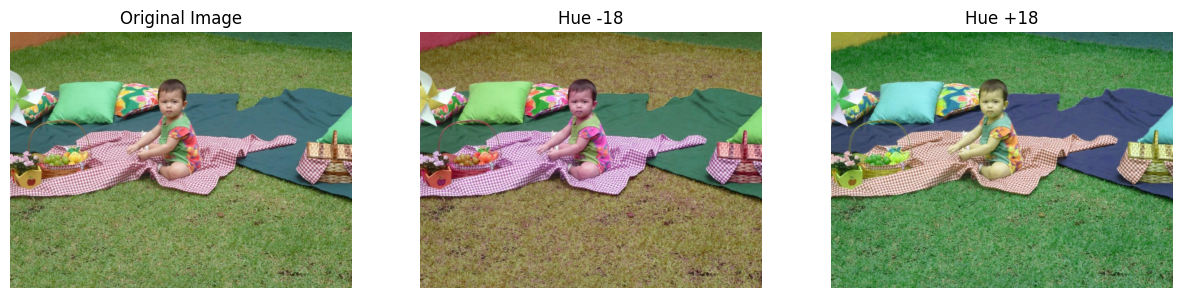

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hue_distortion(image, hue_shift):
    """
    입력 이미지의 Hue 값을 hue_shift 만큼 변경하는 함수.
    hue_shift가 양수면 색조가 증가(+18), 음수면 감소(-18).
    """
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # BGR → HSV 변환
    image_hsv[:, :, 0] = (image_hsv[:, :, 0].astype(int) + hue_shift) % 180  # Hue 값 변경 및 0~179 유지
    distorted_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)  # HSV → BGR 변환
    return distorted_image

# 이미지 로드 (테스트할 이미지 경로 지정)
image = cv2.imread("/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg")  # sample.jpg는 테스트할 이미지 파일

# Hue 변형 적용
hue_minus_18 = hue_distortion(image, -18)  # Hue -18 적용
hue_plus_18 = hue_distortion(image, 18)  # Hue +18 적용

# 결과 비교를 위한 출력
plt.figure(figsize=(15,5))

# 원본 이미지 출력
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Hue -18 적용된 이미지 출력
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(hue_minus_18, cv2.COLOR_BGR2RGB))
plt.title("Hue -18")
plt.axis("off")

# Hue +18 적용된 이미지 출력
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(hue_plus_18, cv2.COLOR_BGR2RGB))
plt.title("Hue +18")
plt.axis("off")

# 화면 출력
plt.show()


In [ ]:
import cv2
import numpy as np

def hue_distortion(image, hue_shift):
    """
    입력 이미지의 Hue 값을 hue_shift 만큼 변경하는 함수.
    hue_shift가 양수면 색조가 증가(+18), 음수면 감소(-18).
    """
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # BGR → HSV 변환
    image_hsv[:, :, 0] = (image_hsv[:, :, 0].astype(int) + hue_shift) % 180  # Hue 값 변경 및 0~179 유지
    distorted_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)  # HSV → BGR 변환
    return distorted_image

# 이미지 로드 (테스트할 이미지 경로 지정)
image = cv2.imread("/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg")  # sample.jpg는 테스트할 이미지 파일

# Hue 변형 적용
hue_minus_18 = hue_distortion(image, -18)  # Hue -18 적용
hue_plus_18 = hue_distortion(image, 18)  # Hue +18 적용

# 결과 출력
cv2.imshow("Original Image", image)
cv2.imshow("Hue -18", hue_minus_18)
cv2.imshow("Hue +18", hue_plus_18)

# 키 입력을 기다리고 창 닫기
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import random

def adjust_contrast(image, alpha):
    """
    대비(contrast)를 조절하는 함수.
    alpha < 1: 대비 감소 (화면이 흐려짐)
    alpha > 1: 대비 증가 (명암이 뚜렷해짐)
    """
    image = image.astype(float) * alpha  # 픽셀 값에 alpha 곱하기
    image[image > 255] = 255  # 255 초과 방지
    image[image < 0] = 0      # 0 미만 방지
    return image.astype(np.uint8)  # uint8로 변환하여 반환

# 이미지 로드 (테스트할 이미지 경로 지정)
image = cv2.imread("/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg")  # sample.jpg는 테스트할 이미지 파일

# 랜덤 대비 값 생성
alpha_random = random.uniform(0.5, 1.5)

# 대비 변형 적용
contrast_low = adjust_contrast(image, 0.5)  # 대비 감소
contrast_high = adjust_contrast(image, 1.5)  # 대비 증가
contrast_random = adjust_contrast(image, alpha_random)  # 랜덤 대비 적용

# 결과 출력
cv2.imshow("Original Image", image)
cv2.imshow("Contrast Low (alpha=0.5)", contrast_low)
cv2.imshow("Contrast High (alpha=1.5)", contrast_high)
cv2.imshow(f"Contrast Random (alpha={alpha_random:.2f})", contrast_random)

# 키 입력을 기다리고 창 닫기
cv2.waitKey(0)
cv2.destroyAllWindows()


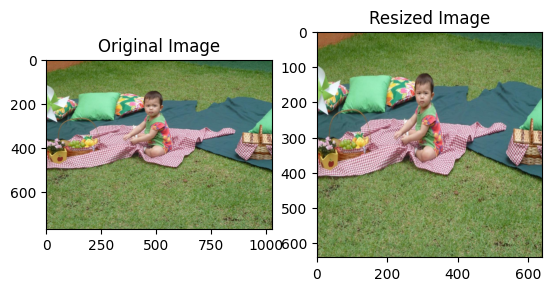

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def _resize_subtract_mean(image, insize, rgb_mean):
    interp_methods = [cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_NEAREST, cv2.INTER_LANCZOS4]
    interp_method = interp_methods[random.randrange(5)]
    
    image_resized = cv2.resize(image, (insize, insize), interpolation=interp_method)
    image_float = image_resized.astype(np.float32)
    image_normalized = image_float - rgb_mean
    image_transposed = image_normalized.transpose(2, 0, 1)  # (H, W, C) → (C, H, W)
    
    return image_transposed, image_resized  # 원본 크롭도 반환

# 테스트 이미지 불러오기
image = cv2.imread("/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg")  # 이미지 파일을 넣어주세요
rgb_mean = np.array([123.68, 116.779, 103.939])

# 함수 실행
image_transposed, image_resized = _resize_subtract_mean(image, 640, rgb_mean)

# 결과 출력
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")

plt.show()


[[[ 62 104 163]
  [ 63 105 164]
  [ 63 105 164]
  ...
  [ 57  90  45]
  [ 61  94  49]
  [ 61  94  49]]

 [[ 62 104 163]
  [ 63 104 164]
  [ 62 104 163]
  ...
  [ 56  88  44]
  [ 58  91  46]
  [ 58  91  46]]

 [[ 61 103 162]
  [ 62 104 162]
  [ 62 104 162]
  ...
  [ 56  89  44]
  [ 57  90  45]
  [ 58  90  46]]

 ...

 [[ 63 120 105]
  [ 79 137 119]
  [ 83 142 121]
  ...
  [ 64 124 105]
  [ 78 130 117]
  [ 93 139 130]]

 [[ 76 134 119]
  [ 77 136 119]
  [ 85 145 124]
  ...
  [ 61 122 101]
  [ 82 134 118]
  [102 149 137]]

 [[ 97 156 141]
  [ 91 151 134]
  [ 86 146 126]
  ...
  [ 52 113  90]
  [ 71 123 107]
  [ 92 139 127]]]


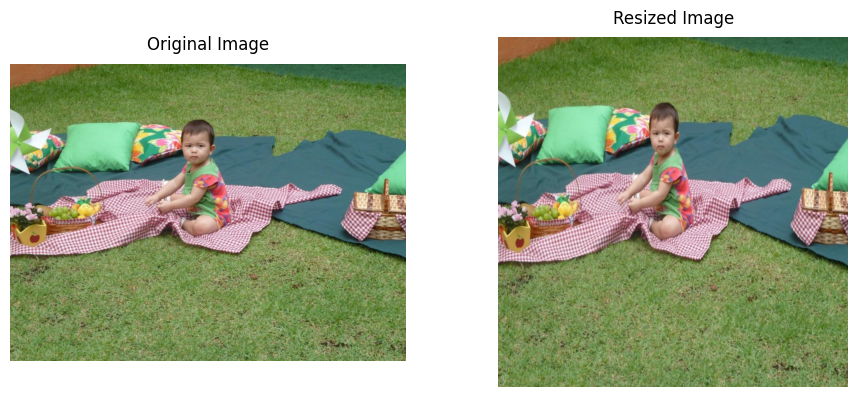

In [5]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def _resize_subtract_mean(image, insize, rgb_mean):
    interp_methods = [cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_NEAREST, cv2.INTER_LANCZOS4]
    interp_method = interp_methods[random.randrange(5)]
    
    image_resized = cv2.resize(image, (insize, insize), interpolation=interp_method)
    image_float = image_resized.astype(np.float32)
    image_normalized = image_float - rgb_mean
    image_transposed = image_normalized.transpose(2, 0, 1)  # (H, W, C) → (C, H, W)
    
    return image_transposed, image_resized  # 원본 크롭도 반환

# 테스트 이미지 불러오기
image = cv2.imread("/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg")  # 이미지 파일을 넣어주세요
rgb_mean = np.array([104, 117, 123])

# 함수 실행
image_transposed, image_resized = _resize_subtract_mean(image, 640, rgb_mean)
print(image_resized)
# 결과 출력
plt.figure(figsize=(10, 5))  # 전체 그래프 크기 설정

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image", pad=10)  # 제목과 이미지 간격 조정
plt.axis("off")  # 축 제거

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image", pad=10)  # 제목과 이미지 간격 조정
plt.axis("off")  # 축 제거

plt.tight_layout(pad=5)  # 두 개의 그래프 사이 간격 설정
plt.show()


In [4]:
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np
from models.retinaface import RetinaFace
from layers.functions.prior_box import PriorBox
from utils.box_utils import decode, decode_landm
from utils.nms.py_cpu_nms import py_cpu_nms
from data import cfg_mnet
# 이미지 변환 (BGR → RGB)
img_raw = "/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg"
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

# Matplotlib으로 이미지 표시
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_rgb)

# 바운딩 박스 및 랜드마크 표시
for b, lm in zip(dets, landms):
    if b[4] < vis_threshold:
        continue

    # 바운딩 박스 그리기
    x1, y1, x2, y2 = map(int, b[:4])
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

    # Confidence Score 표시
    ax.text(x1, y1 - 5, f"{b[4]:.4f}", fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))

    # 랜드마크 색상 설정
    landmark_colors = ['blue', 'cyan', 'magenta', 'lime', 'yellow']  # 랜드마크 색상 리스트

    # 얼굴 랜드마크 그리기 (왼눈, 오눈, 코, 왼입, 오입)
    for i in range(5):
        x, y = map(int, lm[i * 2: i * 2 + 2])
        ax.scatter(x, y, color=landmark_colors[i], s=40, edgecolors='black')

plt.axis("off")  # 축 제거
plt.show()


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [5]:
import os
import torch
import cv2
import numpy as np
from models.retinaface import RetinaFace
from data import cfg_re50
from layers.functions.prior_box import PriorBox
from utils.box_utils import decode, decode_landm
from utils.nms.py_cpu_nms import py_cpu_nms

def load_model(model, pretrained_path, device):
    print(f'Loading pretrained model from {pretrained_path}')
    pretrained_dict = torch.load(pretrained_path, map_location=device)
    model.load_state_dict(pretrained_dict, strict=False)
    return model

def detect_face(image_path, model_path, device='cuda', confidence_threshold=0.5, nms_threshold=0.4):
    device = torch.device(device if torch.cuda.is_available() else "cpu")
    cfg = cfg_mnet  
    
    # 모델 초기화 및 로드
    net = RetinaFace(cfg=cfg, phase='test').to(device)
    net = load_model(net, model_path, device)
    net.eval()
    
    # 이미지 로드
    img_raw = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = np.float32(img_raw)
    
    # 이미지 크기 조정
    im_shape = img.shape
    resize = 1  # 원본 크기 유지
    img -= (104, 117, 123)
    img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).unsqueeze(0).to(device)
    
    # 얼굴 검출
    with torch.no_grad():
        loc, conf, landms = net(img)
    
    # PriorBox 생성
    priors = PriorBox(cfg, image_size=(im_shape[0], im_shape[1])).forward().to(device)
    prior_data = priors.data
    
    # 바운딩 박스 디코딩
    scale = torch.Tensor([im_shape[1], im_shape[0], im_shape[1], im_shape[0]]).to(device)
    boxes = decode(loc.data.squeeze(0), prior_data, cfg['variance']) * scale
    boxes = boxes.cpu().numpy()
    scores = conf.squeeze(0).data.cpu().numpy()[:, 1]
    
    # 랜드마크 디코딩
    scale1 = torch.Tensor([im_shape[1], im_shape[0]] * 5).to(device)
    landms = decode_landm(landms.data.squeeze(0), prior_data, cfg['variance']) * scale1
    landms = landms.cpu().numpy()
    
    # 신뢰도 필터링
    inds = np.where(scores > confidence_threshold)[0]
    boxes, landms, scores = boxes[inds], landms[inds], scores[inds]
    
    # NMS 적용
    dets = np.hstack((boxes, scores[:, np.newaxis])).astype(np.float32, copy=False)
    keep = py_cpu_nms(dets, nms_threshold)
    dets, landms = dets[keep], landms[keep]
    
    return img_raw, dets, landms

def visualize_detections(image, dets, landms, vis_threshold=0.5, save_path="output.jpg"):
    for i, b in enumerate(dets):
        if b[4] < vis_threshold:
            continue
        b = list(map(int, b))
        cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
        
        for j in range(5):
            cv2.circle(image, (int(landms[i][2 * j]), int(landms[i][2 * j + 1])), 2, (0, 255, 0), -1)
    
    cv2.imwrite(save_path, image)
    print(f"Result saved at {save_path}")

# 실행 예제
image_path = "/home/youngoh/retinaface/Pytorch_Retinaface/data/widerface/train/images/22--Picnic/22_Picnic_Picnic_22_763.jpg"  # 입력 이미지 경로
model_path = "/home/youngoh/retinaface/Pytorch_Retinaface/weights/Adam_epoch500/mobilenet0.25_epoch_330.pth"  # 모델 가중치 경로

img_raw, detections, landmarks = detect_face(image_path, model_path)
visualize_detections(img_raw, detections, landmarks, save_path="output.jpg")

Loading pretrained model from /home/youngoh/retinaface/Pytorch_Retinaface/weights/Adam_epoch500/mobilenet0.25_epoch_330.pth
Result saved at output.jpg


In [12]:
import os
import torch
import cv2
import numpy as np
from models.retinaface import RetinaFace
from data import cfg_mnet
from layers.functions.prior_box import PriorBox
from utils.box_utils import decode, decode_landm
from utils.nms.py_cpu_nms import py_cpu_nms

def load_model(model, pretrained_path, device):
    print(f'Loading pretrained model from {pretrained_path}')
    pretrained_dict = torch.load(pretrained_path, map_location=device)
    model.load_state_dict(pretrained_dict, strict=False)
    return model

def detect_face(image_path, model_path, device='cuda', confidence_threshold=0.5, nms_threshold=0.4):
    device = torch.device(device if torch.cuda.is_available() else "cpu")
    cfg = cfg_mnet  # mobilenet 설정 사용
    
    # 모델 초기화 및 로드
    net = RetinaFace(cfg=cfg, phase='test').to(device)
    net = load_model(net, model_path, device)
    net.eval()
    
    # 이미지 로드
    img_raw = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = np.float32(img_raw)
    
    # 이미지 크기 조정
    im_shape = img.shape
    resize = 1  # 원본 크기 유지
    img -= (104, 117, 123)
    img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).unsqueeze(0).to(device)
    
    # 얼굴 검출
    with torch.no_grad():
        loc, conf, landms = net(img)
    
    # PriorBox 생성
    priors = PriorBox(cfg, image_size=(im_shape[0], im_shape[1])).forward().to(device)
    prior_data = priors.data
    
    # 바운딩 박스 디코딩
    scale = torch.Tensor([im_shape[1], im_shape[0], im_shape[1], im_shape[0]]).to(device)
    boxes = decode(loc.data.squeeze(0), prior_data, cfg['variance']) * scale
    boxes = boxes.cpu().numpy()
    scores = conf.squeeze(0).data.cpu().numpy()[:, 1]
    
    # 랜드마크 디코딩
    scale1 = torch.Tensor([im_shape[1], im_shape[0]] * 5).to(device)
    landms = decode_landm(landms.data.squeeze(0), prior_data, cfg['variance']) * scale1
    landms = landms.cpu().numpy()
    
    # 신뢰도 필터링
    inds = np.where(scores > confidence_threshold)[0]
    boxes, landms, scores = boxes[inds], landms[inds], scores[inds]
    
    # NMS 적용
    dets = np.hstack((boxes, scores[:, np.newaxis])).astype(np.float32, copy=False)
    keep = py_cpu_nms(dets, nms_threshold)
    dets, landms = dets[keep], landms[keep]
    
    return img_raw, dets, landms, scores[keep]

def visualize_detections(image, dets, landms, scores, vis_threshold=0.5, save_path="output.jpg"):
    for i, b in enumerate(dets):
        if b[4] < vis_threshold:
            continue
        b = list(map(int, b))
        cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
        text = f"{scores[i]:.2f}"
        cv2.putText(image, text, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        for j in range(5):
            cv2.circle(image, (int(landms[i][2 * j]), int(landms[i][2 * j + 1])), 2, (0, 255, 0), -1)
    
    cv2.imwrite(save_path, image)
    print(f"Result saved at {save_path}")

# 실행 예제
image_path = "/home/youngoh/retinaface/test_folder/김수미.jpg"  # 입력 이미지 경로
model_path = "/home/youngoh/retinaface/Pytorch_Retinaface/weights/Adam_epoch500/mobilenet0.25_epoch_330.pth"  # 모델 가중치 경로

img_raw, detections, landmarks, scores = detect_face(image_path, model_path)
visualize_detections(img_raw, detections, landmarks, scores, save_path="output.jpg")

Loading pretrained model from /home/youngoh/retinaface/Pytorch_Retinaface/weights/Adam_epoch500/mobilenet0.25_epoch_330.pth
Result saved at output.jpg


In [9]:
import os
import numpy as np
from scipy.io import loadmat

def get_hard_gt_boxes(gt_dir):
    """
    Hard 데이터셋이 포함된 GT 박스를 불러오는 함수
    gt_dir: WiderFace 데이터셋이 저장된 폴더 경로
    """
    hard_mat = loadmat(os.path.join(gt_dir, 'wider_hard_val.mat'))  # Hard 난이도 데이터 로드
    hard_gt_list = hard_mat['gt_list']  # Hard 데이터셋의 GT 박스

    return hard_gt_list

# 사용 예시
gt_path = "/home/youngoh/retinaface/Pytorch_Retinaface/widerface_evaluate/ground_truth"  # WiderFace GT 데이터셋 경로
hard_gt_list = get_hard_gt_boxes(gt_path)

# Hard 데이터셋에 포함된 이미지 개수 출력
print(f"Hard Dataset 이미지 개수: {len(hard_gt_list)}")

# 첫 번째 이미지의 Hard 난이도 GT 박스 출력
print("첫 번째 이미지의 Hard GT 박스 좌표:")
print(hard_gt_list[0])


Hard Dataset 이미지 개수: 61
첫 번째 이미지의 Hard GT 박스 좌표:
[array([[array([[ 31],
                [ 32],
                [125]], dtype=uint8)],
        [array([[ 1],
                [ 2],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25]], dtype=uint8)],
        [array([[  2],
                [  3],
                [  4],
                [  5],
                [  6],
                [  7],
                [  8],
                [  9],
                [ 10],
                [ 11],
                [ 12],
                [ 13],
                [ 14],
                [ 15],
                [ 16],
                [ 17],
                [ 18],
                [ 19],
                [ 20],
                [ 21],
                [ 22],
               

In [11]:
import os
import numpy as np
from scipy.io import loadmat

def get_hard_images(gt_dir):
    """
    Hard 난이도에 해당하는 이미지 파일명을 가져오는 함수
    gt_dir: WiderFace 데이터셋이 저장된 폴더 경로
    """
    hard_mat = loadmat(os.path.join(gt_dir, 'wider_hard_val.mat'))  # Hard 난이도 데이터 로드
    gt_mat = loadmat(os.path.join(gt_dir, 'wider_face_val.mat'))  # 전체 GT 데이터 로드

    hard_gt_list = hard_mat['gt_list']  # Hard 난이도 GT 박스
    event_list = gt_mat['event_list']  # 이벤트(폴더) 이름
    file_list = gt_mat['file_list']  # 이미지 파일 이름

    hard_images = []  # Hard 난이도 이미지 파일 이름 리스트
    for i, img_files in enumerate(file_list):
        for j, img_name in enumerate(img_files[0]):
            if len(hard_gt_list[i][0][j]) > 0:  # Hard GT 박스가 존재하는 경우
                event_name = str(event_list[i][0][0])  # 이벤트(폴더) 이름
                image_name = str(img_name[0])  # 이미지 파일 이름
                hard_images.append(f"{event_name}/{image_name}.jpg")

    return hard_images

# 사용 예시
gt_path = "/home/youngoh/retinaface/Pytorch_Retinaface/widerface_evaluate/ground_truth"  # WiderFace GT 데이터셋 경로
hard_image_list = get_hard_images(gt_path)

# Hard Dataset에 포함된 이미지 개수 출력
print(f"Hard Dataset 이미지 개수: {len(hard_image_list)}")

# Hard Dataset에 포함된 이미지 파일 이름 출력 (상위 10개)
print("Hard Dataset 이미지 목록 (상위 10개):")
for img in hard_image_list[:10]:
    print(img)


Hard Dataset 이미지 개수: 3226
Hard Dataset 이미지 목록 (상위 10개):
0--Parade/['0_Parade_marchingband_1_465'].jpg
0--Parade/['0_Parade_Parade_0_628'].jpg
0--Parade/['0_Parade_marchingband_1_765'].jpg
0--Parade/['0_Parade_Parade_0_194'].jpg
0--Parade/['0_Parade_marchingband_1_379'].jpg
0--Parade/['0_Parade_Parade_0_814'].jpg
0--Parade/['0_Parade_Parade_0_470'].jpg
0--Parade/['0_Parade_marchingband_1_1045'].jpg
0--Parade/['0_Parade_marchingband_1_556'].jpg
0--Parade/['0_Parade_Parade_0_829'].jpg


In [13]:
import os
import torch
import cv2
import numpy as np
from models.retinaface import RetinaFace
from data import cfg_mnet
from layers.functions.prior_box import PriorBox
from utils.box_utils import decode, decode_landm
from utils.nms.py_cpu_nms import py_cpu_nms

def load_model(model, pretrained_path, device):
    print(f'Loading pretrained model from {pretrained_path}')
    pretrained_dict = torch.load(pretrained_path, map_location=device)
    model.load_state_dict(pretrained_dict, strict=False)
    return model

def detect_face(image_path, model_path, device='cuda', confidence_threshold=0.5, nms_threshold=0.4):
    device = torch.device(device if torch.cuda.is_available() else "cpu")
    cfg = cfg_mnet  # mobilenet 설정 사용
    
    # 모델 초기화 및 로드
    net = RetinaFace(cfg=cfg, phase='test').to(device)
    net = load_model(net, model_path, device)
    net.eval()
    
    # 이미지 로드
    img_raw = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = np.float32(img_raw)
    
    # 이미지 크기 조정
    im_shape = img.shape
    resize = 1  # 원본 크기 유지
    img -= (104, 117, 123)
    img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).unsqueeze(0).to(device)
    
    # 얼굴 검출
    with torch.no_grad():
        loc, conf, landms = net(img)
    
    # PriorBox 생성
    priors = PriorBox(cfg, image_size=(im_shape[0], im_shape[1])).forward().to(device)
    prior_data = priors.data
    
    # 바운딩 박스 디코딩
    scale = torch.Tensor([im_shape[1], im_shape[0], im_shape[1], im_shape[0]]).to(device)
    boxes = decode(loc.data.squeeze(0), prior_data, cfg['variance']) * scale
    boxes = boxes.cpu().numpy()
    scores = conf.squeeze(0).data.cpu().numpy()[:, 1]
    
    # 랜드마크 디코딩
    scale1 = torch.Tensor([im_shape[1], im_shape[0]] * 5).to(device)
    landms = decode_landm(landms.data.squeeze(0), prior_data, cfg['variance']) * scale1
    landms = landms.cpu().numpy()
    
    # 신뢰도 필터링
    inds = np.where(scores > confidence_threshold)[0]
    boxes, landms, scores = boxes[inds], landms[inds], scores[inds]
    
    # NMS 적용
    dets = np.hstack((boxes, scores[:, np.newaxis])).astype(np.float32, copy=False)
    keep = py_cpu_nms(dets, nms_threshold)
    dets, landms = dets[keep], landms[keep]
    
    return img_raw, dets, landms, scores[keep]

def visualize_detections(image, dets, landms, scores, vis_threshold=0.5, save_path="output.jpg"):
    for i, b in enumerate(dets):
        if b[4] < vis_threshold:
            continue
        b = list(map(int, b))
        cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
        text = f"{scores[i]:.2f}"
        cv2.putText(image, text, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        for j in range(5):
            cv2.circle(image, (int(landms[i][2 * j]), int(landms[i][2 * j + 1])), 2, (0, 255, 0), -1)
    
    cv2.imwrite(save_path, image)
    print(f"Result saved at {save_path}")

# 실행 예제
image_path = "/home/youngoh/retinaface/test_folder/이순재.jpg"  # 입력 이미지 경로
model_path = "/home/youngoh/retinaface/Pytorch_Retinaface/weights/Adam_epoch500/mobilenet0.25_epoch_330.pth"  # 모델 가중치 경로

img_raw, detections, landmarks, scores = detect_face(image_path, model_path)
visualize_detections(img_raw, detections, landmarks, scores, save_path="output2.jpg")

Loading pretrained model from /home/youngoh/retinaface/Pytorch_Retinaface/weights/Adam_epoch500/mobilenet0.25_epoch_330.pth
Result saved at output2.jpg


In [14]:
import os
import json
import torch
import cv2
import numpy as np
import torch.nn.functional as F
from models.retinaface import RetinaFace
from data import cfg_mnet
from layers.functions.prior_box import PriorBox
from utils.box_utils import decode, decode_landm
from utils.nms.py_cpu_nms import py_cpu_nms

def load_model(model, pretrained_path, device):
    print(f'Loading pretrained model from {pretrained_path}')
    pretrained_dict = torch.load(pretrained_path, map_location=device)
    model.load_state_dict(pretrained_dict, strict=False)
    return model

def detect_face(image_path, model_path, device='cuda', confidence_threshold=0.5, nms_threshold=0.4):
    device = torch.device(device if torch.cuda.is_available() else "cpu")
    cfg = cfg_mnet  # MobileNet 설정 사용
    
    # 모델 초기화 및 로드
    net = RetinaFace(cfg=cfg, phase='test').to(device)
    net = load_model(net, model_path, device)
    net.eval()
    
    # 이미지 로드
    img_raw = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = np.float32(img_raw)
    
    # 이미지 크기 조정
    im_shape = img.shape
    img -= (104, 117, 123)
    img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).unsqueeze(0).to(device)
    
    # 얼굴 검출
    with torch.no_grad():
        loc, conf, landms = net(img)
    
    # 🔥 Softmax 적용
    conf = F.softmax(conf, dim=-1)  
    scores = conf.squeeze(0).data.cpu().numpy()[:, 1]  
    
    print(f"Confidence scores range: min={scores.min()}, max={scores.max()}")  # 디버깅

    # PriorBox 생성
    priors = PriorBox(cfg, image_size=(im_shape[0], im_shape[1])).forward().to(device)
    prior_data = priors.data
    
    # 바운딩 박스 디코딩
    scale = torch.Tensor([im_shape[1], im_shape[0], im_shape[1], im_shape[0]]).to(device)
    boxes = decode(loc.data.squeeze(0), prior_data, cfg['variance']) * scale
    boxes = boxes.cpu().numpy()
    
    # 랜드마크 디코딩
    scale1 = torch.Tensor([im_shape[1], im_shape[0]] * 5).to(device)
    landms = decode_landm(landms.data.squeeze(0), prior_data, cfg['variance']) * scale1
    landms = landms.cpu().numpy()
    
    # 신뢰도 필터링
    inds = np.where(scores > confidence_threshold)[0]
    boxes, landms, scores = boxes[inds], landms[inds], scores[inds]
    
    # NMS 적용
    dets = np.hstack((boxes, scores[:, np.newaxis])).astype(np.float32, copy=False)
    keep = py_cpu_nms(dets, nms_threshold)
    dets, landms = dets[keep], landms[keep]
    
    return img_raw, dets, landms, scores[keep]

def save_results(image, dets, landms, scores, save_dir="results", vis_threshold=0.5):
    os.makedirs(save_dir, exist_ok=True)
    cropped_faces_dir = os.path.join(save_dir, "cropped_faces")
    os.makedirs(cropped_faces_dir, exist_ok=True)
    
    output_image_path = os.path.join(save_dir, "output.jpg")
    output_json_path = os.path.join(save_dir, "detections.json")

    results = []
    
    for i, b in enumerate(dets):
        if b[4] < vis_threshold:
            continue
        b = list(map(int, b))
        
        # 얼굴 바운딩 박스 저장
        face_data = {
            "box": b[:4],  # (x1, y1, x2, y2)
            "score": float(scores[i]),
            "landmarks": landms[i].tolist()
        }
        results.append(face_data)

        # 얼굴 바운딩 박스 그리기
        cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
        text = f"{scores[i]:.2f}"
        cv2.putText(image, text, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # 랜드마크 그리기
        for j in range(5):
            cv2.circle(image, (int(landms[i][2 * j]), int(landms[i][2 * j + 1])), 2, (0, 255, 0), -1)

        # 얼굴 영역 잘라서 저장
        face_crop = image[b[1]:b[3], b[0]:b[2]]
        face_filename = os.path.join(cropped_faces_dir, f"face_{i}.jpg")
        cv2.imwrite(face_filename, face_crop)

    # JSON으로 저장
    with open(output_json_path, "w") as f:
        json.dump(results, f, indent=4)
    
    # 시각화된 이미지 저장
    cv2.imwrite(output_image_path, image)

    print(f"✅ 결과 저장 완료!")
    print(f"📷 검출된 얼굴 이미지: {cropped_faces_dir}")
    print(f"📜 JSON 데이터: {output_json_path}")
    print(f"🖼️ 시각화된 이미지: {output_image_path}")

# 실행 예제
image_path = "/home/youngoh/retinaface/test_folder/이순재.jpg"  # 입력 이미지 경로
model_path = "/home/youngoh/retinaface/Pytorch_Retinaface/weights/Adam_epoch500/mobilenet0.25_epoch_330.pth"  # 모델 가중치 경로

# 얼굴 검출 수행
img_raw, detections, landmarks, scores = detect_face(image_path, model_path)

# 결과 저장
save_results(img_raw, detections, landmarks, scores, save_dir="results")


Loading pretrained model from /home/youngoh/retinaface/Pytorch_Retinaface/weights/Adam_epoch500/mobilenet0.25_epoch_330.pth
Confidence scores range: min=0.2689414322376251, max=0.7310351729393005
✅ 결과 저장 완료!
📷 검출된 얼굴 이미지: results/cropped_faces
📜 JSON 데이터: results/detections.json
🖼️ 시각화된 이미지: results/output.jpg


In [16]:
0.5 * np.exp(0.1*0.2)

0.5101006700133779

In [24]:
torch.tensor([0.5, 0.6]) * torch.exp(torch.tensor([1, 1])*0.1)

tensor([0.5526, 0.6631])